# Experimentation with networkx

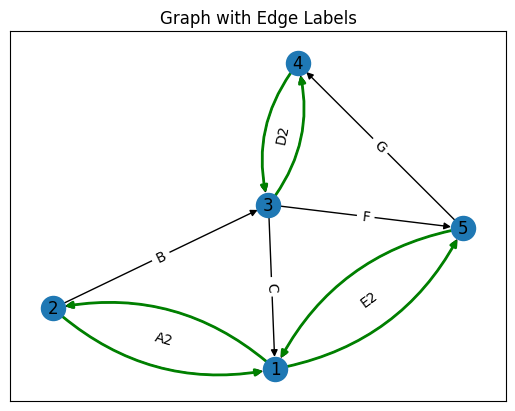

In [20]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
edge_list = [(1, 2, {"w": "A1"}), (2, 1, {"w": "A2"}), (2, 3, {"w": "B"}), (3, 1, {"w": "C"}), (3, 4, {"w": "D1"}), (4, 3, {"w": "D2"}), (1, 5, {"w": "E1"}), (5, 1, {"w": "E2"}), (3, 5, {"w": "F"}), (5, 4, {"w": "G"})]
G.add_edges_from(edge_list)
pos = nx.spring_layout(G, seed=5)
fig, ax = plt.subplots()
nx.draw_networkx_nodes(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)

curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
straight_edges = list(set(G.edges()) - set(curved_edges))
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=straight_edges)
arc_rad = 0.25
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=curved_edges, connectionstyle=f"arc3, rad = {arc_rad}")

# Add labels to the edges
edge_labels = nx.get_edge_attributes(G, "w")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Highlight specific edges
# This feature is not directly available in NetworkX, so we'll have to redraw these edges with a different color
highlight_edges = [(1, 2), (1, 5), (2, 1), (3, 4), (4, 3), (5, 1)]
nx.draw_networkx_edges(G, pos, edgelist=highlight_edges, edge_color="g", width=2, connectionstyle=f"arc3, rad = {arc_rad}")

plt.title("Graph with Edge Labels")
plt.show()


# Matlab code reference

In [ ]:
# https://www.mathworks.com/help/matlab/math/use-page-rank-algorithm-to-rank-websites.html

# s = {'a' 'a' 'a' 'b' 'b' 'c' 'd' 'd' 'd'};
# t = {'b' 'c' 'd' 'd' 'a' 'b' 'c' 'a' 'b'};
# G = digraph(s,t);
# labels = {'a/3' 'a/3' 'a/3' 'b/2' 'b/2' 'c' 'd/3' 'd/3' 'd/3'};
# p = plot(G,'Layout','layered','EdgeLabel',labels);
# highlight(p,[1 1 1],[2 3 4],'EdgeColor','g')
# highlight(p,[2 2],[1 4],'EdgeColor','r')
# highlight(p,3,2,'EdgeColor','m')
# title('PageRank Score Transfer Between Nodes')